In [1]:
import numpy as np
from sklearn.neighbors import KernelDensity
import matplotlib.pyplot as plt
%matplotlib inline
from scipy.stats import beta
import timeit
from scipy.optimize import minimize

# The true distribution
We take the true distribution of $y$ to be $\mathcal{Beta}(3,3)$ drawn on $[-1,1]$. i.e. we have unormalized density
<br>
<center> $(1+y)^2(1-y)^2$

We seek to find $x^*$ such that it solves $\min_x E[c(x,y)]$ where
<br>
<center>$c(x,y) = 3x^2 + 6xy^2 - 2x^2y - 7xy$.

This can be solved analytically, whereby $x$ is minimised at $-1/7$ = -0.14286.

In [2]:
# the cost function we would like to minimise
def f(x,y):
    return np.mean(3*x**2 + 6*x*y**2 - 2*x**2*y - 7*x*y,axis=0)

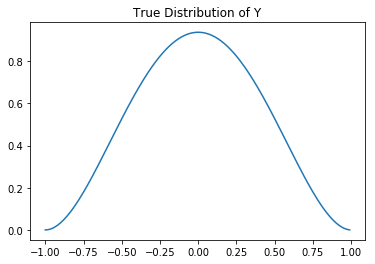

In [3]:
# Define the true distribution
Y = beta(a = 3,b=3,loc=-1,scale=2)

# plot the pdf within the range
x = np.arange (-1, 1, 0.01)
z = Y.pdf(x)
plt.plot(x,z)
plt.title("True Distribution of Y")

In [4]:
# Some experimental hyper parameters

# number of iterations to perform each experiment
n_iter = 1000

# number of samples for each experiment
# we use 50, 100, 150...., 5000 samples
N = [50,200, 800,3200,6400]

## Sample Average Approximation

In [5]:
def SSA_minimise(samples, func, p0=0.0):
    res = minimize(func,p0,args=(samples))
    return res.x

In [6]:
def KDE_minimise(samples, bandwidth, func, p0=0.0, n_sample=10000):
    # fit using kde
    kde = KernelDensity(bandwidth=bandwidth)
    kde.fit(np.reshape(samples,(-1,1)))
    
    # sample from fitted distribution
    KDE_samples = kde.sample(n_sample)
    
    # minimise the function
    res = minimize(func,p0,args=(KDE_samples))
    return res.x

In [7]:
start_time = timeit.default_timer()

SSA_results = np.zeros((n_iter,len(N)))
KDE_results = np.zeros((n_iter,len(N)))
KDE_results_1 = np.zeros((n_iter,len(N)))
KDE_results_2 = np.zeros((n_iter,len(N)))
for k in range(n_iter):
    for j in range(len(N)):
        # obtain the samples
        S = Y.rvs(N[j])
    
        SSA_results[k,j] = SSA_minimise(S,f)
        KDE_results[k,j] = KDE_minimise(S, 0.0001, f)
        KDE_results_1[k,j] = KDE_minimise(S, 0.01, f)
        KDE_results_2[k,j] = KDE_minimise(S, 0.05, f)
        
elapsed = timeit.default_timer() - start_time
print("This has taken %.2f seconds") %elapsed

This has taken 330.63 seconds


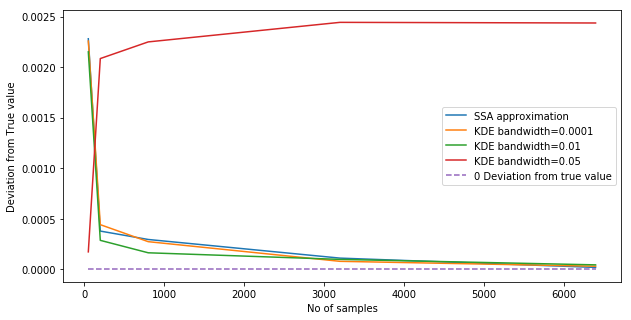

In [8]:
plt.figure(figsize=(10,5))
plt.plot(N,abs(np.mean(SSA_results,axis=0)+1.0/7),label='SSA approximation')
plt.plot(N,abs(np.mean(KDE_results,axis=0)+1.0/7),label='KDE bandwidth=0.0001')
plt.plot(N,abs(np.mean(KDE_results_1,axis=0)+1.0/7),label='KDE bandwidth=0.01')
plt.plot(N,abs(np.mean(KDE_results_2,axis=0)+1.0/7),label='KDE bandwidth=0.05')
plt.plot(N,[0]*len(N),'--',label='0 Deviation from true value')
plt.xlabel('No of samples')
plt.ylabel('Deviation from True value')
plt.legend()

Although the pdf for bandwidth=0.05 seems to match better, there is a bias when minimising the cost function, compared to other bandwidths.

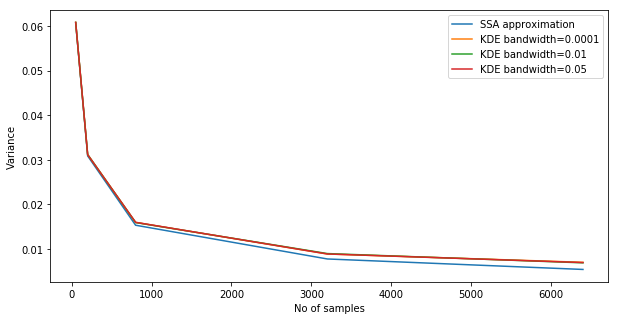

In [9]:
plt.figure(figsize=(10,5))
plt.plot(N,np.std(SSA_results,axis=0),label='SSA approximation')
plt.plot(N,np.std(KDE_results,axis=0),label='KDE bandwidth=0.0001')
plt.plot(N,np.std(KDE_results_1,axis=0),label='KDE bandwidth=0.01')
plt.plot(N,np.std(KDE_results_2,axis=0),label='KDE bandwidth=0.05')
plt.xlabel('No of samples')
plt.ylabel('Variance')
plt.legend()

## Plot fitted pdf for sample size = 50

In [10]:
S = Y.rvs(50)

kde1 = KernelDensity(bandwidth=0.0001)
kde1.fit(np.reshape(S,(-1,1)))
# minimise the cost function given the samples, with initial starting point of 0
kde2 = KernelDensity(bandwidth=0.01)
kde2.fit(np.reshape(S,(-1,1)))
kde3 = KernelDensity(bandwidth=0.05)
kde3.fit(np.reshape(S,(-1,1)))


KernelDensity(algorithm='auto', atol=0, bandwidth=0.05, breadth_first=True,
       kernel='gaussian', leaf_size=40, metric='euclidean',
       metric_params=None, rtol=0)

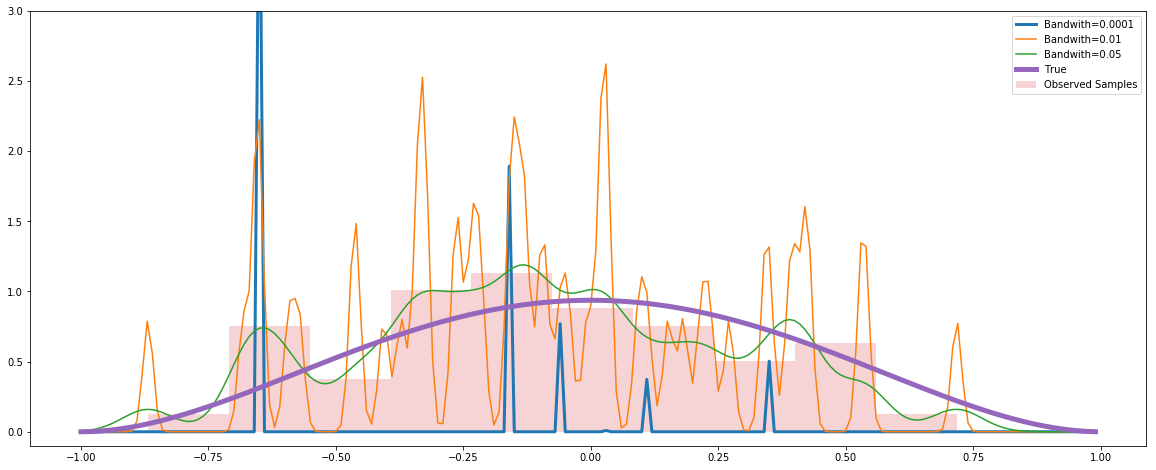

In [11]:
plt.figure(figsize=(20,8))
plt.plot(x,np.exp(kde1.score_samples(np.reshape(x,(-1,1)))),label='Bandwith=0.0001',linewidth=3.0)
plt.plot(x,np.exp(kde2.score_samples(np.reshape(x,(-1,1)))),label='Bandwith=0.01')
plt.plot(x,np.exp(kde3.score_samples(np.reshape(x,(-1,1)))),label='Bandwith=0.05')
plt.hist(S,normed=True,label='Observed Samples',alpha=0.2)
plt.plot(x,z,label='True',linewidth=5.0)
plt.ylim([-0.1,3])
#plt.hist(S,bins=30,normed=True,label='Observed samples')
plt.legend()
#plt.hist(kde.sample(5000),normed=True)

### Plot pdf for sample = 3200

In [12]:
S = Y.rvs(3200)

kde1 = KernelDensity(bandwidth=0.0001)
kde1.fit(np.reshape(S,(-1,1)))
# minimise the cost function given the samples, with initial starting point of 0
kde2 = KernelDensity(bandwidth=0.01)
kde2.fit(np.reshape(S,(-1,1)))
kde3 = KernelDensity(bandwidth=0.05)
kde3.fit(np.reshape(S,(-1,1)))


KernelDensity(algorithm='auto', atol=0, bandwidth=0.05, breadth_first=True,
       kernel='gaussian', leaf_size=40, metric='euclidean',
       metric_params=None, rtol=0)

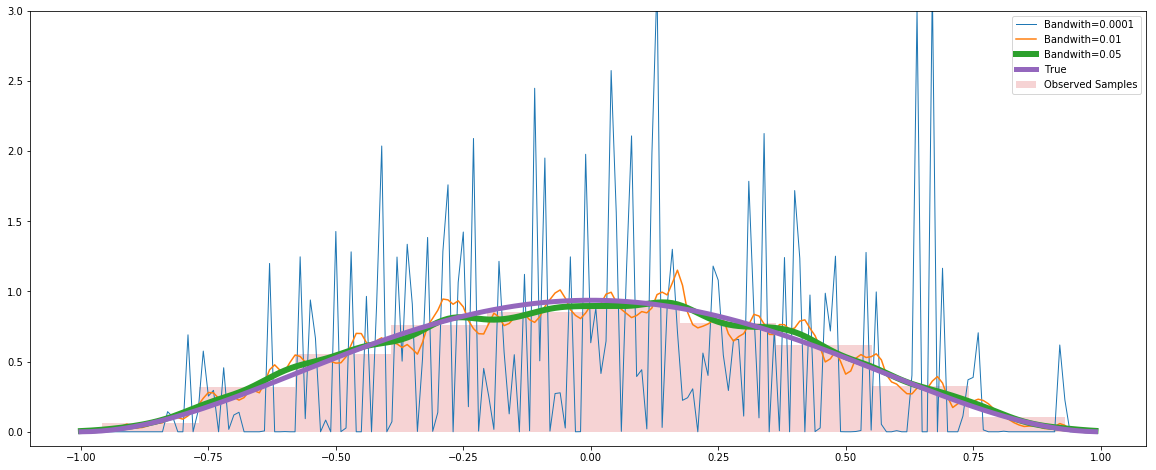

In [13]:
plt.figure(figsize=(20,8))
plt.plot(x,np.exp(kde1.score_samples(np.reshape(x,(-1,1)))),label='Bandwith=0.0001',linewidth=1.0)
plt.plot(x,np.exp(kde2.score_samples(np.reshape(x,(-1,1)))),label='Bandwith=0.01')
plt.plot(x,np.exp(kde3.score_samples(np.reshape(x,(-1,1)))),label='Bandwith=0.05',linewidth=6.0)
_,bins,_ = plt.hist(S,normed=True,label='Observed Samples',alpha=0.2)
plt.plot(x,z,label='True',linewidth=5.0)
plt.ylim([-0.1,3])
#plt.hist(S,bins=30,normed=True,label='Observed samples')
plt.legend()
#plt.hist(kde.sample(5000),normed=True)